In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [3]:
from helpers import load_data

# load dataset
x, y = load_data()

In [72]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [73]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    test_x = x[k_indices[k]]
    test_y = y[k_indices[k]]

    mask = np.ones(x.shape, bool)
    mask[k_indices[k]] = False

    train_x = x[mask]
    train_y = y[mask]

    train_x = build_poly(train_x,degree)
    test_x = build_poly(test_x,degree)


    w = ridge_regression(train_y, train_x, lambda_)
    loss_tr = np.sqrt(2* compute_mse(train_y, train_x, w))
    loss_te = np.sqrt(2* compute_mse(test_y, test_x, w))
    

    return loss_tr, loss_te

[1.0484655350285172, 1.0505628699960257, 1.052923468147438, 1.0554514796784995, 1.058037400577031, 1.0605901942544214, 1.063069009400757, 1.0655069372644057, 1.0680247592463918, 1.070834177887737, 1.0742267062757416, 1.078541759490254, 1.0841139424810284, 1.091219133079525, 1.1000622184809226, 1.110854529395838, 1.124003591428735, 1.1403960499894492, 1.161718374754547, 1.1907243449872953, 1.2313015500982132, 1.2881354014465907, 1.3658273531054599, 1.467588551856982, 1.5939772851273248, 1.7422599947839883, 1.906718907065545, 2.0798194717441016, 2.2538253055727258, 2.422293274971344]


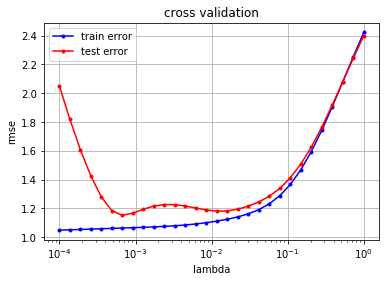

In [74]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    for lambda_ in lambdas:
        te_tmp = []
        tr_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(x, y, k_indices, k,lambda_, degree)
            tr_tmp += [loss_tr]
            te_tmp += [loss_te]
        rmse_tr += [np.mean(tr_tmp)]
        rmse_te += [np.mean(te_tmp)]
    
    print(rmse_tr)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

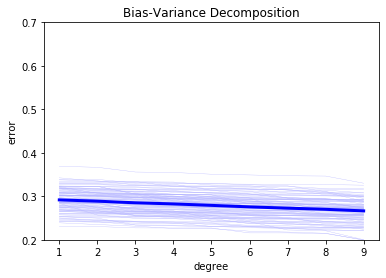

In [80]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        train_x, train_y, test_x, test_y = split_data(x,y,ratio_train, seed)
        for index_degree, degree in enumerate(degrees):
            # form polynomial data
            tx_tr = build_poly(train_x, degree)
            tx_te = build_poly(test_x, degree)
            # least square
            w = least_squares(train_y, tx_tr)
            # calculate the rmse for train and test
            rmse_tr[index_seed, index_degree] = np.sqrt(2 * compute_mse(train_y, tx_tr, w))
            rmse_te[index_seed, index_degree] = np.sqrt(2 * compute_mse(test_y, tx_te, w))

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()